In [1]:
# model selection
from ml.model_selection import GridSearchCV
from ml.functions.metrics.classification import F1Score, BinaryAccuracy, Precision, Recall

# data manipulation
from ml.dataset import load_csv, split_train_test
from ml.algorithms.normalization import MinMaxScaler

# Utility
import numpy as np
import matplotlib.pyplot as plt

# Sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay

np.random.seed(20)

## Load dataset

In [2]:
X, y = load_csv('./datasets/californiabin.csv')

y = y.astype(int).squeeze()
X_train, y_train, X_test, y_test = split_train_test(X, y, 0.7, shuffle=True)

In [3]:
scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Q1 - SVM and Random Forest

### Q1.a - Grid search with 10-fold cross-validation
#### SVM

In [4]:
params = {
    'C': [2E-5, 2E-3, 2E-1, 2E1, 2E3, 2E5, 2E7, 2E11, 2E13, 2E15],
    'gamma': [2E-15, 2E-13, 2E-11, 2E-9, 2E-7, 2E-5, 2E-3, 2E-1, 2E1, 2E2, 2E3]
}

svm_grid = GridSearchCV(SVC(), params, n_jobs=-1, cv=10).fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [ ]:
best_svm = svm_grid.best_estimator_
print(f"Best SVM parameters:\n\t{best_svm}")

Best SVM parameters:
	SVC(C=200000.0, gamma=0.2)


#### Random Forest

In [ ]:
parameters = {
    'n_estimators': np.linspace(10, 200, 10, dtype=int),
    'max_depth': [2, 4, 6, 8, None]
}

rf_grid = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=-1, cv=10).fit(X_train_scaled, y_train)

In [ ]:
best_rf = rf_grid.best_estimator_
print(f"Best RandomForest parameters:\n\tRandomForestClassifier(n_estimators={best_rf.n_estimators}, max_depth_{best_rf.max_depth})")

Best RandomForest parameters:
	RandomForestClassifier(n_estimators=178, max_depth_None)


### Q1.b - Report performance

#### Performance measurements of the best model on the **test** dataset

In [ ]:
svm_y_pred = best_svm.predict(X_test_scaled)

print("SVM Accuracy:", BinaryAccuracy().measure(y_test, svm_y_pred))
print("SVM Precision:", Precision().measure(y_test, svm_y_pred))
print("SVM Recall:", Recall().measure(y_test, svm_y_pred))
print("SVM F1-score:", F1Score().measure(y_test, svm_y_pred))

SVM Accuracy: 0.8488888888888889
SVM Precision: 0.8503253796095445
SVM Recall: 0.8540305010893247
SVM F1-score: 0.8521739130434783


In [ ]:
rf_y_pred = best_rf.predict(X_test_scaled)

print("RF Accuracy:", BinaryAccuracy().measure(y_test, svm_y_pred))
print("RF Precision:", Precision().measure(y_test, svm_y_pred))
print("RF Recall:", Recall().measure(y_test, svm_y_pred))
print("RF F1-score:", F1Score().measure(y_test, svm_y_pred))

RF Accuracy: 0.8488888888888889
RF Precision: 0.8503253796095445
RF Recall: 0.8540305010893247
RF F1-score: 0.8521739130434783


#### RoC and Precision-Recall curves - SVM

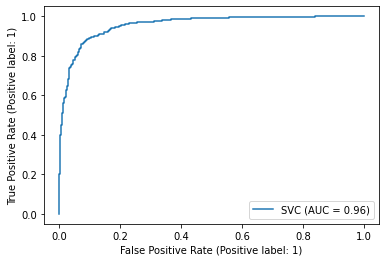

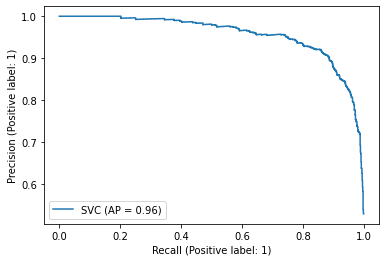

In [ ]:
RocCurveDisplay.from_estimator(best_svm, X_train_scaled, y_train)
PrecisionRecallDisplay.from_estimator(best_svm, X_train_scaled, y_train)

#### RoC and Precision-Recall curves - RandomForest

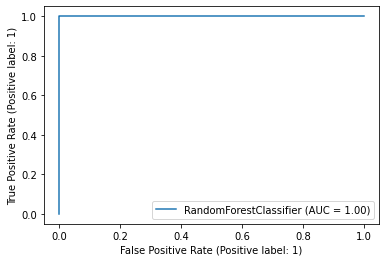

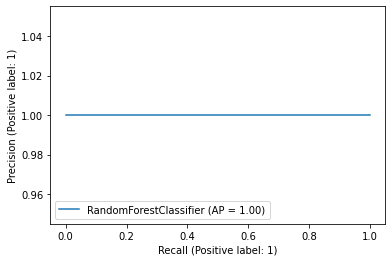

In [ ]:
RocCurveDisplay.from_estimator(best_rf, X_train_scaled, y_train)
PrecisionRecallDisplay.from_estimator(best_rf, X_train_scaled, y_train)